# python KNN demo

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## get data set

In [2]:
import pandas as pd
iris=pd.read_csv('../iris_data/iris.csv', index_col=0) # 将第一列作为行名字
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape

(150, 5)

In [4]:
# string to color list
def str2color(strs, dict1):
    arr=[]
    for item in strs:
        arr.append(dict1[item])
    return arr;

colors=str2color(iris['Species'], {'setosa':'red', 'versicolor':'green', 'virginica':'blue'})
colors[0:10]

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']

In [5]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


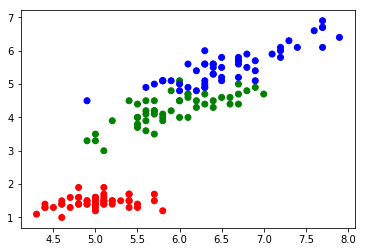

In [6]:
import matplotlib.pyplot as plt
plt.scatter(iris['Sepal.Length'], iris['Petal.Length'], color=colors )

### to 1 function

In [7]:
import numpy as np
def splitData(df, test_ratio):
    # 索引范围为[0, n), 随机选x个不重复
    n=df.shape[0]
    x=round(n*test_ratio)
    index = np.random.choice(np.arange(n), size=x, replace=False)
    #
    test_index = np.array(index)
    train_index = np.delete(np.arange(n), test_index)
    return df.iloc[train_index,],df.iloc[test_index,]
np.random.seed(1)
train_set, test_set=splitData(iris, 0.2)
print(train_set.shape)
print(test_set.shape)

(120, 5)
(30, 5)


In [8]:
test_set

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
15,5.8,4.0,1.2,0.2,setosa
99,5.1,2.5,3.0,1.1,versicolor
76,6.6,3.0,4.4,1.4,versicolor
17,5.4,3.9,1.3,0.4,setosa
132,7.9,3.8,6.4,2.0,virginica
57,6.3,3.3,4.7,1.6,versicolor
142,6.9,3.1,5.1,2.3,virginica
45,5.1,3.8,1.9,0.4,setosa
30,4.7,3.2,1.6,0.2,setosa
121,6.9,3.2,5.7,2.3,virginica


## calculate dist

In [9]:
test_set.iloc[1,]

Sepal.Length           5.1
Sepal.Width            2.5
Petal.Length             3
Petal.Width            1.1
Species         versicolor
Name: 99, dtype: object

In [10]:
# 
a=train_set.iloc[:,0:4]
b=test_set.iloc[0,0:4]
dist=np.sqrt( np.sum((a-b)**2,1) )

#train_set.iloc[:,4:5]
df=pd.DataFrame( {'dist':dist, 'clazz':train_set['Species']} )
print(df.head())
df.tail()

       dist   clazz
1  0.883176  setosa
2  1.360147  setosa
3  1.363818  setosa
4  1.529706  setosa
5  0.916515  setosa


,dist,clazz
145,5.180734,virginica
146,4.713809,virginica
148,4.553021,virginica
149,4.750789,virginica
150,4.333590,virginica


## order dist

In [11]:
df2 = df.sort_values(by='dist', ascending=True)
df3=df2.head(7)
df3

,dist,clazz
16,0.547723,setosa
19,0.556776,setosa
11,0.583095,setosa
37,0.591608,setosa
49,0.655744,setosa
33,0.685565,setosa
47,0.830662,setosa


## count type freq

In [12]:
df3['clazz']

16    setosa
19    setosa
11    setosa
37    setosa
49    setosa
33    setosa
47    setosa
Name: clazz, dtype: object

In [13]:
def getTopFreq(string1):
    dict1={}
    for item in string1:
        if item not in dict1:
            dict1[item]=1
        else:
            dict1[item]+=1
    #print(dict1)
    for k,v in dict1.items():
        if v==max(dict1.values()):
            return k
    return None
        
rs=getTopFreq(df3['clazz'])
rs

'setosa'

### to 1 function

In [14]:
def classify0(testOne, trainSet, lables, k):
    # (1) dist
    #a=trainSet#train_set.iloc[:,0:4]
    #b=testOne #test_set.iloc[0,0:4]
    dist=np.sqrt( np.sum((trainSet-testOne)**2,1) )
    # (2) order dist
    df=pd.DataFrame( {'dist':dist, 'clazz':lables} ) #train_set['Species']
    df2 = df.sort_values(by='dist', ascending=True)
    df3=df2.head(k)
    # (3) return top freq item
    return getTopFreq(df3['clazz'])
# test
classify0(test_set.iloc[0,0:4], train_set.iloc[:,0:4], train_set['Species'], 7)

'setosa'

In [15]:
print(test_set.iloc[1,4])
classify0(test_set.iloc[1,0:4], train_set.iloc[:,0:4], train_set['Species'], 7)

versicolor


'versicolor'

In [16]:
j=3
print(test_set.iloc[j,4])
classify0(test_set.iloc[j,0:4], train_set.iloc[:,0:4], train_set['Species'], 10)

setosa


'setosa'

## get the best K

In [17]:
np.sqrt(150)

12.24744871391589

In [68]:
import time
start=time.time()

def testCorrectRatio_K(k,n):
    j=0
    for i in range(n):
        pred = classify0(test_set.iloc[i,0:4], train_set.iloc[:,0:4], train_set['Species'], k)
        if pred==test_set.iloc[i,4]:
            j+=1
    return j/n
#

rightArr=[]
n=test_set.shape[0]
for k in range(1,100):
    rightRatio=testCorrectRatio_K(k,n)
    rightArr.append(rightRatio)
    #print(k, rightRatio)
time.time()-start

10.163182973861694

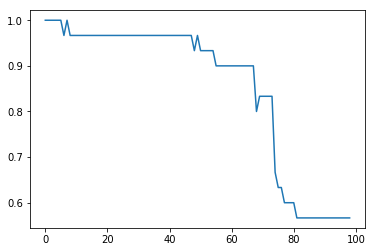

In [59]:
plt.plot(rightArr)

## using the best K

In [20]:
i=1
print(test_set.iloc[i,0:4])
classify0(test_set.iloc[i,0:4], train_set.iloc[:,0:4], train_set['Species'], k=30)

Sepal.Length    5.1
Sepal.Width     2.5
Petal.Length      3
Petal.Width     1.1
Name: 99, dtype: object


'versicolor'

In [21]:
# 自定义数据
classify0(np.array([4.9,2.5,4.5,1.7]), train_set.iloc[:,0:4], train_set['Species'], k=30)

'versicolor'

In [22]:
# 自定义数据
classify0(np.array([1.9,1.5,1.5,0.7]), train_set.iloc[:,0:4], train_set['Species'], k=30)

'setosa'

# KNN using package

In [65]:
from sklearn.neighbors import KNeighborsClassifier

import time
start=time.time()

correctArr=[]
n=len(np.array(test_set.iloc[:,4]))
for k in range(1,100):
    neigh=KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_set.iloc[:,0:4], train_set.iloc[:,4])
    pred=neigh.predict(test_set.iloc[:,0:4])
    j=0
    for i in range(n):
        r1=pred[i]
        r2=np.array(test_set.iloc[:,4])[i]
        if r1==r2:
            j+=1
    correctArr.append(j/n)

time.time()-start

0.8075385093688965

In [ ]:
## 比我写的快太多了！我写10s，这个0.8s;

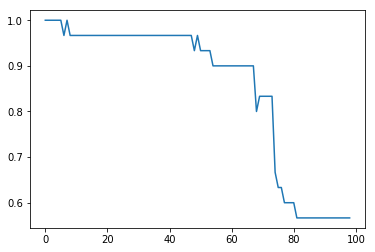

In [57]:
plt.plot(correctArr)

# 手写体数字识别 //todo